In [254]:
# import autograd's automatic differentiator
from autograd import grad
from autograd import hessian
import autograd.numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import confusion_matrix

In [255]:
def sign(x):
    a_1 = np.array(x>=0, dtype = np.int)
    a_2 = np.array(x<0, dtype = np.int)
    return a_1*1 + a_2*(-1)

def softmax(w):
    cost = np.sum(beta*np.log(1+np.exp(-y*model(x_norm,w))))
    return cost/float(np.size(y))

def model(x,w):
    result = w[0] + np.dot(x, w[1:])
    return result

def statistics_number(y, alpha = 1):
    negative = np.array(y == -1, dtype = np.int)
    positive = np.array(y == 1,dtype = np.int)
    nega_number = np.sum(negative)
    posi_number = np.sum(positive)
    if nega_number < posi_number:
        nega_coefficient = negative * alpha
        posi_coefficient = positive * 1.0
    else:
        nega_coefficient = negative * 1.0
        posi_coefficient = positive * alpha      
    coefficient = nega_coefficient + posi_coefficient 
    return coefficient

def accuracy(w):
    y_pred = sign(model(x_norm,w))
    y_pred = list(y_pred)
    y_true = list(y)
    tn, fp, fn, tp = confusion_matrix(y_true,y_pred).ravel()
    A_positive = tp/(tp+fn)
    A_negative = tn/(tn+fp)
    balanced_A = 0.5*(A_positive+A_negative)
    accuracy = (tn+tp)/(tn + fp + fn + tp)
    return accuracy,balanced_A

In [256]:
csvname = '3d_classification_data_v2_mbalanced.csv'
data = np.loadtxt(csvname, delimiter = ',')
data = data.T
x = data[:,:-1]
y = data[:,-1]

In [257]:
# we do the normalization of these data matrix
x_means = np.mean(x, axis = 0)
x_stds = np.std(x, axis = 0)
# normalize the input data
x_norm = normalize(x, x_means, x_stds)

In [258]:
# we use newtons method to do the GD, which is the pointed optimizer.
max_its = 5
w_init = np.random.randn(x.shape[1]+1)
beta = statistics_number(y,alpha = 1)
weight_history = newtons_method(softmax,max_its,w_init)

In [259]:
def plotting(cost_hist, ylabelName, label):
    figure, axes = plt.subplots(1,1, figsize = (6,5))
    axes.plot(range(len(cost_hist)),cost_hist, label = label, linestyle = "solid")
    axes.set_xlabel("iterations")
    axes.set_ylabel(ylabelName)
    axes.legend()
    plt.show()

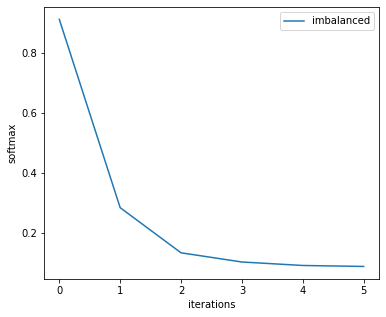

In [260]:
cost_history = [softmax(v) for v in weight_history]
plotting(cost_history, "softmax", "imbalanced")

In [261]:
# now we set the beta = 1, which is default
best_weight = weight_history[-1]
accuracy(best_weight)

(0.9454545454545454, 0.79)

The accuracy of the dataset is 0.95, but the balanced accuracy is 0.79, because the minority has more misclassification

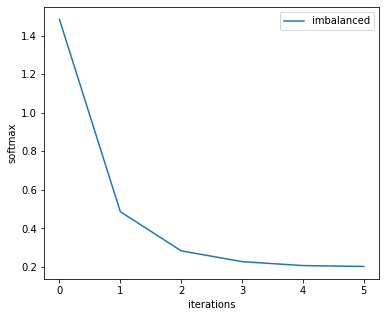

In [263]:
# now we set the beta = 5, which is the middle value
beta = statistics_number(y,alpha = 5)
weight_history = newtons_method(softmax,max_its,w_init)
cost_history = [softmax(v) for v in weight_history]
plotting(cost_history, "softmax", "imbalanced")

In [264]:
best_weight = weight_history[-1]
accuracy(best_weight)

(0.9090909090909091, 0.8600000000000001)

The accuracy of the dataset is 0.91, but the balanced accuracy is 0.86.

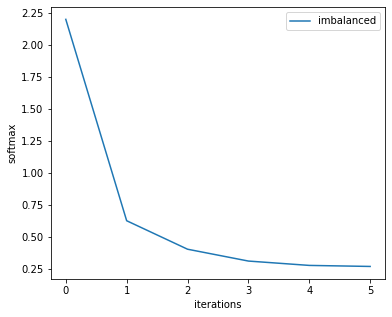

In [265]:
# now we set the beta = 5, which is the middle value
beta = statistics_number(y,alpha = 10)
weight_history = newtons_method(softmax,max_its,w_init)
cost_history = [softmax(v) for v in weight_history]
plotting(cost_history, "softmax", "imbalanced")

In [266]:
# now we set the beta = 10, which is the largest
best_weight = weight_history[-1]
accuracy(best_weight)

(0.9090909090909091, 0.95)

The accuracy of the dataset is 0.91, but the balanced accuracy is 0.95.

conclusion: when we adjust the weight of the monority dataset, beta = 10, we finally finally reach the balanced accuracy = 0.95, which is consistent with the description of the example 6.12.